In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import numpy as np
import scipy.cluster.hierarchy as sch

In [2]:
model_df = pd.read_csv("/hpc/users/divagt01/watanabe/Divagar/CCLE_data/Model.csv")
tpm_df = pd.read_csv("/hpc/users/divagt01/watanabe/Divagar/CCLE_data/OmicsExpressionProteinCodingGenesTPMLogp1BatchCorrected.csv")


In [3]:
tpm_df.columns = tpm_df.columns.str.replace(r'\s\(\d+\)', '', regex=True)


In [4]:
tpm_df.rename(columns=
    {'Unnamed: 0': 'ModelID'
}, inplace=True)

In [5]:
merged_df = pd.merge(model_df,tpm_df, on='ModelID')

In [6]:
merged_df

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,...,OR2A42,HOXB7,NSA2,UGT2B11,ZNF747,NAA60,MYH4,MTAP,C14orf93,NR3C2
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,...,0.009417,4.106717,6.053204,0.061850,0.408757,4.228354,-0.001724,5.227941,2.886005,0.627949
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",...,-0.013226,0.048482,5.159365,-0.007723,2.075931,4.218123,-0.001724,3.500397,2.310291,0.029718
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,...,-0.013226,4.482314,7.961631,0.141090,1.666220,5.200370,0.034327,4.082677,2.074519,0.029718
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",...,-0.013226,3.711867,7.454226,0.075366,2.672987,5.247975,-0.001724,0.104274,3.436403,0.241304
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,...,-0.013226,2.936647,7.041191,0.006466,2.743486,4.883065,-0.001724,0.024972,3.540384,0.701488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,ACH-003472,PT-oYnuwE,CCLF_THYR_0009_T,CCLFTHYR0009T,THME,Thyroid,Medullary Thyroid Cancer,Medullary Thyroid Cancer,THME,NaN,...,0.065954,0.106886,5.307687,0.010848,2.113647,3.414589,0.000741,1.726336,2.897736,1.124578
1669,ACH-003473,PT-fG5tCh,CCLF_PEDS_0013_T,CCLFPEDS0013T,ERMS,Soft Tissue,Rhabdomyosarcoma,Embryonal Rhabdomyosarcoma,ERMS,NaN,...,0.026960,3.221310,6.636813,0.010848,1.521476,4.268350,0.000741,3.597152,3.017883,0.305028
1670,ACH-003474,PT-WxfjG3,CCLF_HNSC_0001_T,CCLFHNSC0001T,HNSC,Head and Neck,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,HNSC,NaN,...,0.026960,2.532913,5.923111,0.010848,1.221046,2.741533,0.000741,3.933095,1.770244,0.209698
1671,ACH-003475,PT-ce6oqw,CCLF_HNSC_0003_T,CCLFHNSC0003T,HNSC,Head and Neck,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,HNSC,NaN,...,0.026960,3.877685,7.719151,0.010848,2.428769,4.887929,0.000741,4.267142,2.751242,0.577123


In [7]:
lung_cells = merged_df[merged_df['OncotreeLineage'] == 'Lung']
lung_cells = lung_cells.set_index('StrippedCellLineName')

In [8]:
lung_cells['OncotreeSubtype'].unique()

array(['Lung Adenocarcinoma', 'Large Cell Lung Carcinoma',
       'Non-Small Cell Lung Cancer', 'Immortalized Lung Cells',
       'SMARCA4-deficient undifferentiated tumor',
       'NUT Carcinoma of the Lung', 'Lung Squamous Cell Carcinoma',
       'Small Cell Lung Cancer', 'Lung Adenosquamous Carcinoma',
       'Giant Cell Carcinoma of the Lung', 'Lung Carcinoid',
       'Mucoepidermoid Carcinoma of the Lung',
       'Poorly Differentiated Non-Small Cell Lung Cancer',
       'Immortalized Epithelial Cells, Lung', 'Immortalized MPLC Cells'],
      dtype=object)

In [9]:
NE_genes = ['KIF1A', 'GNAO1','DPYSL5','SYP','CHGA','KIF5C','SCAMP5','TUBB2B','SCG3','GNG4','CRMP1','RUNDC3A','CHRNB2','BEX1','PGBD5','CHGB','RAB39A', 'NCAM1','TMEM198','AP3B2','UNC13A','MAPK8IP1','SNAP25','SOGA3','INSM1']
non_NE_genes = ['HFE','ITGB4','IL18','ANXA3','CAV2','GPRC5A','AHNAK','ADGRG6','IFITM3','CAV1','EPHA2','GPX8','LGALS3','CCN1','RHBDF1','NT5E','WWTR1','NABP1','OSMR','YAP1','TGFBR2','ANXA1','S100A16','MYOF','EMP1']

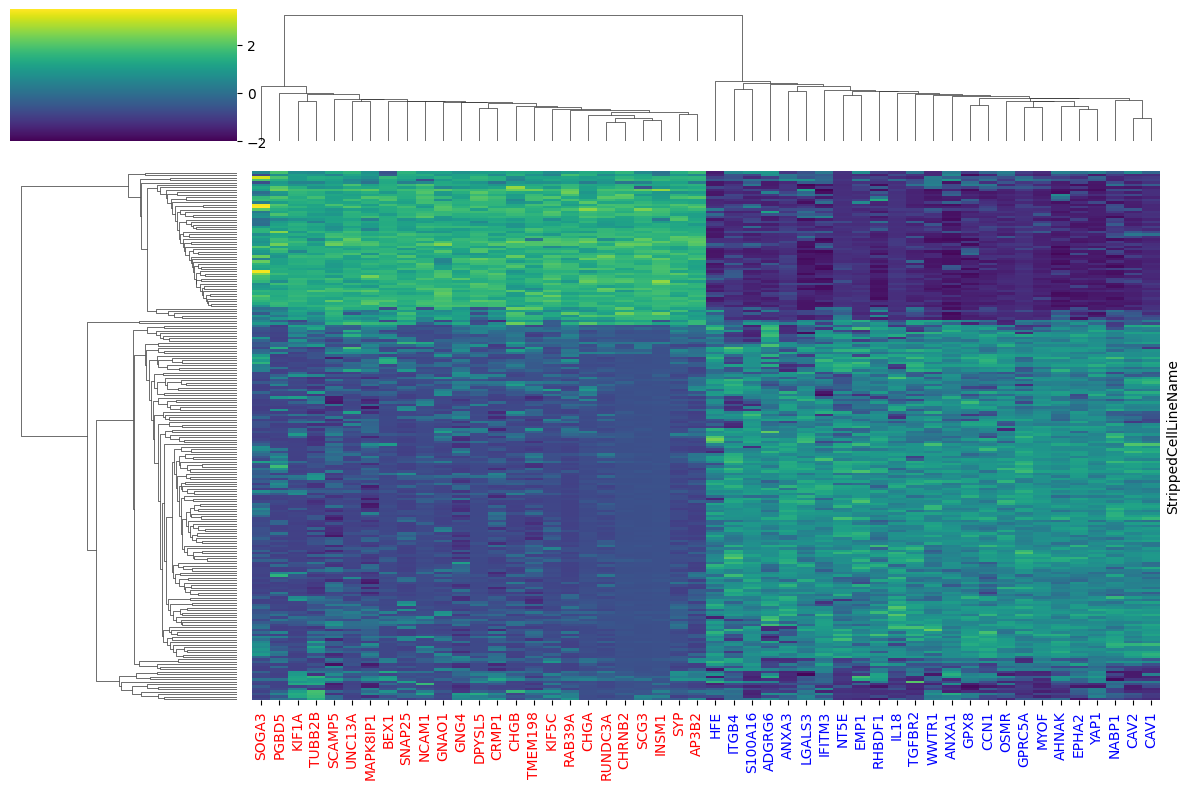

In [10]:
selected_genes = NE_genes + non_NE_genes
expression_subset = lung_cells[selected_genes]

g = sns.clustermap(expression_subset, cmap='viridis', figsize=(12, 8), 
               xticklabels=True, yticklabels=False,z_score=1, 
               col_cluster=True)

xticklabels = g.ax_heatmap.get_xticklabels()

for i, label in enumerate(xticklabels):
    if label.get_text() in NE_genes:
        label.set_color('red')  # Set NE genes to red
    elif label.get_text() in non_NE_genes:
        label.set_color('blue')  # Set non-NE genes to blue

plt.gca().set_ylabel('') 

plt.tight_layout()
plt.show()

In [11]:
linkage_matrix = g.dendrogram_row.linkage

def track_cells_in_merge(linkage_matrix, num_cells):
    # Initialize each cell line as its own cluster
    clusters = {i: [i] for i in range(num_cells)}  # Each index represents a single cell line initially
    
    # Iterate over each merge step in the linkage matrix
    for merge in linkage_matrix:
        cluster1_idx = int(merge[0])
        cluster2_idx = int(merge[1])

        # Get the cell lines involved in this merge
        cluster1_cells = clusters[cluster1_idx]
        cluster2_cells = clusters[cluster2_idx]

        # Merge the two clusters
        new_cluster = cluster1_cells + cluster2_cells

        # Print information about the current merge
        print(f"Merge step: {int(merge[3])} cells are merged")
        print(f"Cluster 1: {cluster1_cells}")
        print(f"Cluster 2: {cluster2_cells}")
        print(f"Resulting cluster: {new_cluster}\n")

        # Update the clusters dictionary (merge the clusters)
        clusters[num_cells] = new_cluster
        del clusters[cluster1_idx]
        del clusters[cluster2_idx]
        num_cells += 1

# Get the number of initial cell lines (rows in the heatmap)
num_cells = linkage_matrix.shape[0] + 1  # Because the linkage matrix has one less row than the number of original items

# Track which cell lines are being split at each merge step
track_cells_in_merge(linkage_matrix, num_cells)

Merge step: 2 cells are merged
Cluster 1: [64]
Cluster 2: [102]
Resulting cluster: [64, 102]

Merge step: 2 cells are merged
Cluster 1: [25]
Cluster 2: [139]
Resulting cluster: [25, 139]

Merge step: 3 cells are merged
Cluster 1: [110]
Cluster 2: [64, 102]
Resulting cluster: [110, 64, 102]

Merge step: 4 cells are merged
Cluster 1: [72]
Cluster 2: [110, 64, 102]
Resulting cluster: [72, 110, 64, 102]

Merge step: 2 cells are merged
Cluster 1: [210]
Cluster 2: [212]
Resulting cluster: [210, 212]

Merge step: 6 cells are merged
Cluster 1: [25, 139]
Cluster 2: [72, 110, 64, 102]
Resulting cluster: [25, 139, 72, 110, 64, 102]

Merge step: 2 cells are merged
Cluster 1: [150]
Cluster 2: [161]
Resulting cluster: [150, 161]

Merge step: 2 cells are merged
Cluster 1: [192]
Cluster 2: [193]
Resulting cluster: [192, 193]

Merge step: 2 cells are merged
Cluster 1: [65]
Cluster 2: [191]
Resulting cluster: [65, 191]

Merge step: 7 cells are merged
Cluster 1: [90]
Cluster 2: [25, 139, 72, 110, 64, 102

In [12]:
NE_idx=[12, 208, 78, 196, 117, 133, 44, 186, 19, 121, 85, 105, 27, 47, 170, 204, 21, 82, 114, 35, 134, 28, 61, 157, 17, 39, 180, 185, 184, 194, 131, 67, 68, 136, 113, 187, 60, 156, 36, 190, 126, 192, 193, 42, 130, 205, 65, 191, 90, 25, 139, 72, 110, 64, 102, 108, 103, 195, 84, 144]
non_NE_idx=[23, 124, 26, 148, 119, 116, 171, 62, 168, 24, 98, 201, 11, 77, 66, 213, 164, 169, 163, 173, 177, 57, 207, 115, 143, 55, 101, 40, 153, 54, 199, 197, 56, 118, 162, 46, 174, 49, 32, 38, 154, 51, 48, 97, 69, 155, 172, 128, 58, 178, 74, 112, 0, 3, 120, 15, 87, 76, 109, 159, 10, 132, 151, 18, 129, 52, 165, 135, 160, 9, 95, 167, 140, 200, 88, 145, 71, 73, 92, 33, 63, 94, 75, 83, 150, 161, 37, 198, 59, 79, 142, 8, 211, 123, 182, 138, 210, 212, 147, 14, 4, 125, 41, 53, 45, 80, 158, 91, 176, 149, 29, 81, 2, 5, 100, 203, 93, 107, 6, 141, 127, 166, 7, 189, 30, 20, 111, 209, 50, 202, 99, 179, 86, 22, 104, 16, 137, 106, 183, 175, 31, 146, 1, 96, 34, 70, 13, 89, 181, 188, 43, 152, 122, 206]

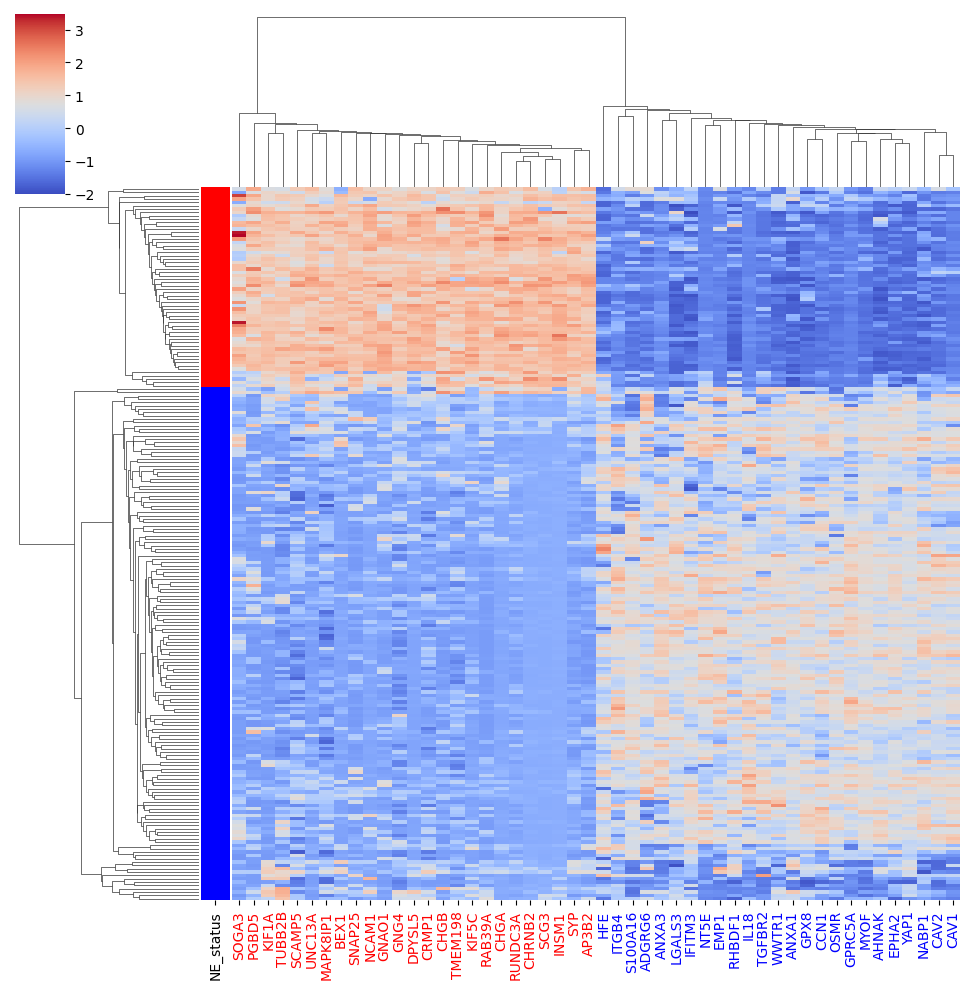

In [16]:
# Create a color mapping for NE and non-NE groups
colors = np.array(['red' if i in NE_idx else 'blue' for i in range(len(lung_cells))])

# Create a DataFrame with the color information
color_df = pd.DataFrame(colors, columns=["NE_status"], index=lung_cells.index)

# Select the subset of genes you're interested in (NE_genes + non_NE_genes)
selected_genes = NE_genes + non_NE_genes
expression_subset = lung_cells[selected_genes]

# Plot the heatmap using seaborn's clustermap with row_colors argument for group coloring
h = sns.clustermap(expression_subset, z_score=1,
               cmap='coolwarm', 
               xticklabels=True, 
               yticklabels=False, 
               row_colors=color_df["NE_status"])

xticklabels = h.ax_heatmap.get_xticklabels()

for i, label in enumerate(xticklabels):
    if label.get_text() in NE_genes:
        label.set_color('red')  # Set NE genes to red
    elif label.get_text() in non_NE_genes:
        label.set_color('blue')  # Set non-NE genes to blue

h.ax_heatmap.set_ylabel("")


h.savefig("/hpc/users/divagt01/watanabe/Divagar/scRNAseq_pipeline/figures/ccle_ne_clustering.png", dpi=600, bbox_inches='tight')


In [17]:
NE_status = ['NE' if i in NE_idx else 'non-NE' for i in range(len(lung_cells))]
lung_cells['NE_status'] = NE_status


In [18]:
lung_cells['NE_status']

StrippedCellLineName
HCC827       non-NE
NCIH1581     non-NE
NCIH1693     non-NE
HCC827GR5    non-NE
PC14         non-NE
              ...  
ABMT0796     non-NE
ABMT0794     non-NE
ABMT0795     non-NE
ABMT0797     non-NE
ABMT0822     non-NE
Name: NE_status, Length: 214, dtype: object

In [19]:
lung_cells_ne = lung_cells[lung_cells['NE_status'] == 'NE']
lung_cells_non_ne = lung_cells[lung_cells['NE_status'] == 'non-NE']


In [22]:
lung_cells

,ModelID,PatientID,CellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,RRID,...,HOXB7,NSA2,UGT2B11,ZNF747,NAA60,MYH4,MTAP,C14orf93,NR3C2,NE_status
StrippedCellLineName,,,,,,,,,,,,,,,,,,,,,
HCC827,ACH-000012,PT-NdspH5,HCC-827,LUAD,Lung,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,LUAD,NaN,CVCL_2063,...,3.390804,7.071446,-0.007723,1.121535,4.480743,-0.001724,6.237322,2.709303,0.029718,non-NE
NCIH1581,ACH-000015,PT-ffwajI,NCI-H1581,LCLC,Lung,Non-Small Cell Lung Cancer,Large Cell Lung Carcinoma,LCLC,NaN,CVCL_1479,...,3.056162,6.405361,-0.007723,2.278645,4.689568,-0.001724,3.444632,3.449646,0.043885,non-NE
NCIH1693,ACH-000021,PT-9p1WQv,NCI-H1693,LUAD,Lung,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,LUAD,NaN,CVCL_1488,...,5.125889,8.242663,-0.007723,1.682117,3.511913,-0.001724,4.527644,3.128145,0.203910,non-NE
HCC827GR5,ACH-000029,PT-NdspH5,HCC-827-GR5,LUAD,Lung,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,LUAD,NaN,CVCL_V622,...,3.430096,6.526533,0.010848,0.981097,4.610499,0.000741,6.880190,3.310896,0.107554,non-NE
PC14,ACH-000030,PT-nDRyc6,PC-14,LUAD,Lung,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,LUAD,NaN,CVCL_1640,...,4.649539,6.820043,-0.007723,2.411791,4.882119,-0.001724,4.010094,2.754455,0.191227,non-NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABMT0796,ACH-003152,PT-44ykgT,ABM-T0796,ZIMMEPCL,Lung,Non-Cancerous,"Immortalized Epithelial Cells, Lung",NaN,NaN,NaN,...,4.686599,6.823922,0.010848,2.025481,4.752626,0.000741,3.749154,2.422079,0.586621,non-NE
ABMT0794,ACH-003153,PT-CL2j3Q,ABM-T0794,ZIMMEPCL,Lung,Non-Cancerous,"Immortalized Epithelial Cells, Lung",NaN,NaN,NaN,...,0.491985,6.629032,0.010848,2.042679,3.982795,0.000741,5.713553,2.857988,0.258158,non-NE
ABMT0795,ACH-003154,PT-CL2j3Q,ABM-T0795,ZIMMEPCL,Lung,Non-Cancerous,"Immortalized Epithelial Cells, Lung",NaN,NaN,NaN,...,3.243619,7.571786,0.010848,2.068111,4.269978,0.000741,4.812097,3.332652,0.633186,non-NE


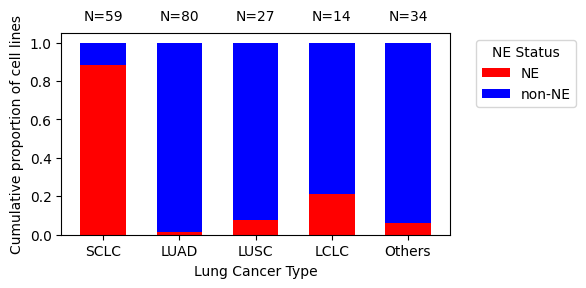

In [24]:
import matplotlib.pyplot as plt

lung_cells.loc[lung_cells["OncotreeSubtype"] == "Small Cell Lung Cancer", "SimplifiedSubtype"] = "SCLC"
lung_cells.loc[lung_cells["OncotreeSubtype"] == "Lung Adenocarcinoma", "SimplifiedSubtype"] = "LUAD"
lung_cells.loc[lung_cells["OncotreeSubtype"] == "Lung Squamous Cell Carcinoma", "SimplifiedSubtype"] = "LUSC"
lung_cells.loc[lung_cells["OncotreeSubtype"] == "Large Cell Lung Carcinoma", "SimplifiedSubtype"] = "LCLC"
lung_cells.loc[~lung_cells["OncotreeSubtype"].isin(["Small Cell Lung Cancer", "Lung Adenocarcinoma","Lung Squamous Cell Carcinoma","Large Cell Lung Carcinoma"]), "SimplifiedSubtype"] = "Others"

desired_order = ["SCLC","LUAD","LUSC","LCLC","Others"]

# Group by NE_status and SimplifiedSubtype
subtype_counts = lung_cells.groupby(['NE_status', 'SimplifiedSubtype']).size().unstack(fill_value=0)

# Normalize each subtype so that it sums to 100% (1)
subtype_props = subtype_counts.div(subtype_counts.sum(axis=0), axis=1)

# Reorder columns to match desired axis order
subtype_props = subtype_props[desired_order].T  # Transpose so subtypes are on the x-axis

# Plot
ax = subtype_props.plot(kind='bar', stacked=True, figsize=(6, 3), width=0.6, color=['Red','Blue'])

# Label axes
ax.set_ylabel('Cumulative proportion of cell lines')
ax.set_xlabel('Lung Cancer Type')

# Set x-tick labels
ax.set_xticklabels(desired_order, rotation=0)

# Add legend
ax.legend(title='NE Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the total number of cell lines (n=...)
for i, subtype in enumerate(desired_order):
    total_cells = subtype_counts[subtype].sum()  # Sum of all cells in this subtype
    ax.text(i, 1.1, f'N={total_cells}', ha='center', va='bottom', fontsize=10)

# Adjust layout for better fit
plt.tight_layout()
plt.savefig("/hpc/users/divagt01/watanabe/Divagar/scRNAseq_pipeline/figures/ccle_ne_barplot.png", dpi=600, bbox_inches='tight')


In [25]:
# Subset for NE cells
ne_cells = lung_cells[lung_cells['NE_status'] == 'NE']

# Subset for non-NE cells
non_ne_cells = lung_cells[lung_cells['NE_status'] == 'non-NE']

ne_ne_avg_expression = ne_cells[NE_genes].mean()

ne_non_ne_avg_expression = ne_cells[non_NE_genes].mean()

non_ne_ne_avg_expression = non_ne_cells[NE_genes].mean()

non_ne_non_ne_avg_expression = non_ne_cells[non_NE_genes].mean()

combined_avg_expression = pd.DataFrame({
    'NE_cells': pd.concat([ne_ne_avg_expression, ne_non_ne_avg_expression]),
    'non_NE_cells': pd.concat([non_ne_ne_avg_expression, non_ne_non_ne_avg_expression])
})

# Sort the index (gene names) to keep the order consistent
combined_avg_expression = combined_avg_expression.sort_index()

# Display the resulting DataFrame
print(combined_avg_expression)

lung_cells.to_csv("/hpc/users/divagt01/watanabe/Divagar/scRNAseq_pipeline/lung_cells_gene_expr.csv")
#combined_avg_expression.to_csv("/hpc/users/divagt01/watanabe/Divagar/scRNAseq_pipeline/ne_non_ne_gene_expr.csv")

          NE_cells  non_NE_cells
ADGRG6    0.853426      3.970360
AHNAK     1.617402      6.076176
ANXA1     2.507135      8.943371
ANXA3     1.015099      5.259950
AP3B2     4.788846      0.913154
BEX1      8.147746      1.262690
CAV1      1.012543      6.814463
CAV2      1.243835      5.974868
CCN1      1.681304      6.768556
CHGA      7.254023      0.673074
CHGB      6.801924      1.303938
CHRNB2    4.484158      0.222805
CRMP1     6.942086      1.783082
DPYSL5    5.692610      0.686566
EMP1      0.824346      5.396428
EPHA2     1.004591      5.454971
GNAO1     5.204666      0.897088
GNG4      6.761711      2.095346
GPRC5A    0.692361      5.463361
GPX8      0.934012      5.033977
HFE       0.713744      3.085449
IFITM3    2.843242      8.159295
IL18      0.098186      4.591964
INSM1     6.909546      0.215769
ITGB4     1.188271      5.131020
KIF1A     7.174273      1.468198
KIF5C     6.275194      0.840910
LGALS3    2.418779      7.221257
MAPK8IP1  4.918500      2.083283
MYOF      